### Customer Segmentation using K-Means Clustering

This project aims to segment customers, based on their Spending Score, to devise for marketing strategy.

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

In [66]:
path = "./Mall_Customers.csv"
customers = pd.read_csv(path)

In [67]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [68]:
customers.info()
# data is clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [69]:
customers.drop('CustomerID', axis=1, inplace=True)
customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### General Analysis

In [70]:
customers.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Distribution across Age, Annual Income and Spending Score

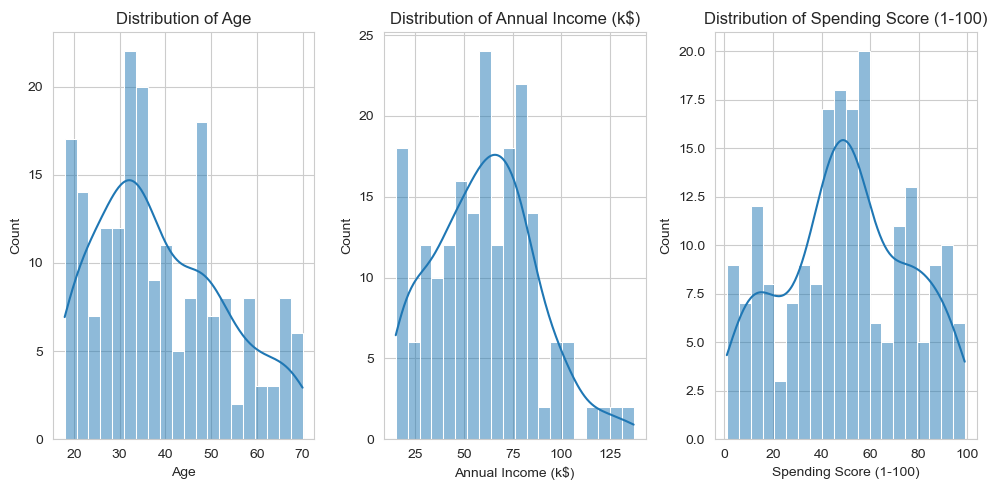

In [71]:
list = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

plt.figure(figsize=(10,5))
for n, columns in enumerate(list):
    plt.subplot(1, len(list), n+1)
    sns.histplot(customers[columns], bins=20, kde=True)
    plt.title(f"Distribution of {columns}")

plt.tight_layout()
plt.show()

Distribution of customer's gender

<Axes: xlabel='count', ylabel='Gender'>

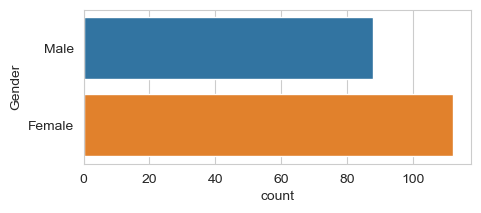

In [72]:
plt.figure(figsize=(5,2))
sns.countplot(y="Gender", data=customers)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

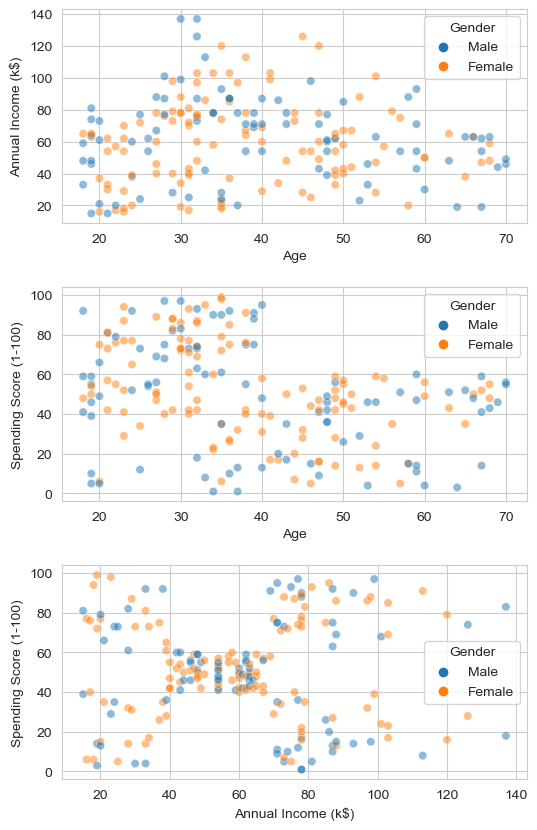

In [73]:
plt.figure(figsize=(6,10))
plt.subplots_adjust(hspace= 0.3)
plt.subplot(3,1,1)
sns.scatterplot(x=customers["Age"], y=customers["Annual Income (k$)"], hue=customers["Gender"], alpha=0.5)
plt.subplot(3,1,2)
sns.scatterplot(x=customers["Age"], y=customers["Spending Score (1-100)"], hue=customers["Gender"], alpha=0.5)
plt.subplot(3,1,3)
sns.scatterplot(x=customers["Annual Income (k$)"], y=customers["Spending Score (1-100)"], hue=customers["Gender"], alpha=0.5)

A quick overview show that,
1. Annual income across each age group is nicely distributed, with small number of high income customers between age of late 20 to 60 years old
2. Most customers have average spending score around the middle, and customers below age 40 tend to spend more
3. Since most customers is at average income of 40k~80k, most customers' spending score is around 40-60

Target customer Hypothesis:
1. Mostly below age of 50
2. Spending score above 40
3. Annual income mean and below (Affordable products)

#### Analysis based on Annual Income (k$) & Spending Score (1-100)

In [74]:
X = customers[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


##### Choosing number of clusters

Using elbow method by plotting WCSS (Within-Cluster Sum of Squares) for different values of k
1. choose range of values for number of clusters, k (aka. numer of centroids)
2. Apply k-means clustering for each value in range k (assign centroid, assign data points to closest centroid, calculate mean of datatpoints within cluster, update centroid, repeat until converge)
3. plot WCSS vs. number of clusters, and look for elbow point = optimal number of clusters

In [75]:
n_clusters_max = 10
n_clusters_max += 1
wcss = []

for i in range(1, n_clusters_max):
    kmeans = KMeans(n_clusters=i, random_state=77)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


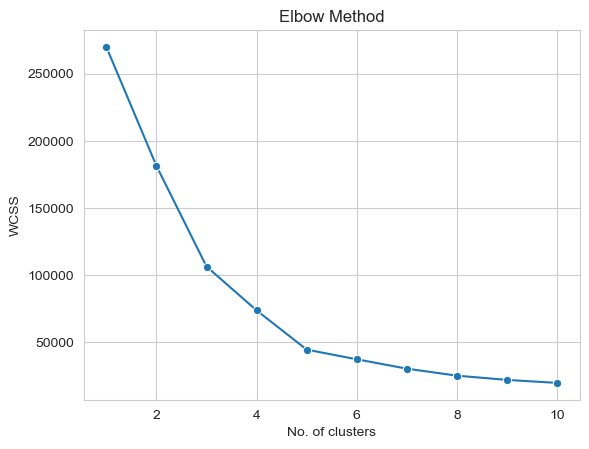

In [76]:
sns.set_style("whitegrid")
sns.lineplot(x=range(1,n_clusters_max), y=wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

##### Training the K-Means Clustering Model

In [77]:
n_cluster = 5

kmeans = KMeans(n_clusters=n_cluster, random_state=59)

# return label for each data point baseb on their cluster
kmeans.fit(X)
y = kmeans.labels_
print(f"Labels of each datapoint: \n{y}\n")

centers = kmeans.cluster_centers_
print(f"Coordinate of each centroid: \n{centers}")

Labels of each datapoint: 
[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 0 1 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 3 2 0 2 3 2 3 2 0 2 3 2 3 2 3 2 3 2 0 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]

Coordinate of each centroid: 
[[55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [25.72727273 79.36363636]]


##### Visualizing data

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

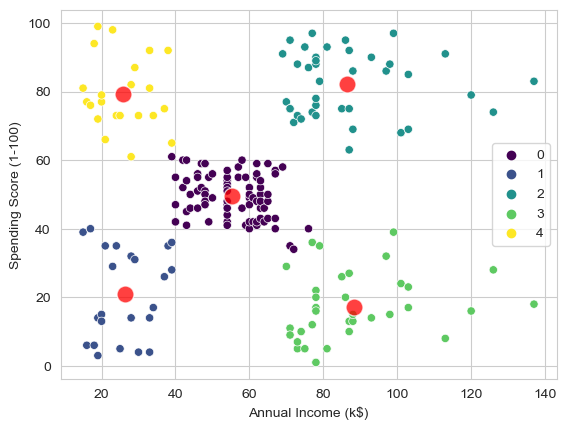

In [78]:
# in dataframe, select all rows, column[0] = annual income, column[1] = spending score
# plot Spending Score vs. Annual Income
# group datapoints with different colors based on clusters' label
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=y, palette='viridis')
sns.scatterplot(x=centers[:,0], y=centers[:,1], c='red', s=150, alpha=0.75)

From the scatterplot, Groups 4, 2, and 0 has high spending score

In [79]:
customers['income_groups'] = y
target_income_groups = [0, 4, 2]
customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income_groups
0,Male,19,15,39,1
1,Male,21,15,81,4
2,Female,20,16,6,1
3,Female,23,16,77,4
4,Female,31,17,40,1


Text(0.5, 1.0, 'Gender distribution')

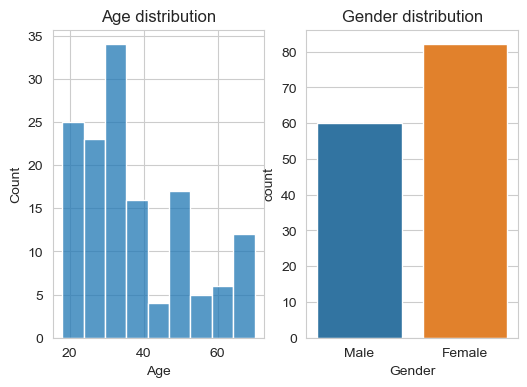

In [80]:
filtered_customers = customers[customers['income_groups'].isin(target_income_groups)]

plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.histplot(filtered_customers['Age'])
plt.title("Age distribution")
plt.subplot(1,2,2)
sns.countplot(x='Gender', data=filtered_customers)
plt.title("Gender distribution")

Target Customer seems to be Young, and slightly more Female

#### Analysis based on Age and Spending Score (1-100)

In [81]:
X = customers[["Age", 'Spending Score (1-100)']]
X.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [82]:
n_clusters_max = 10
n_clusters_max +=1
wcss = []

for i in range(1, n_clusters_max):
    kmeans=KMeans(n_clusters=i, random_state=39)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

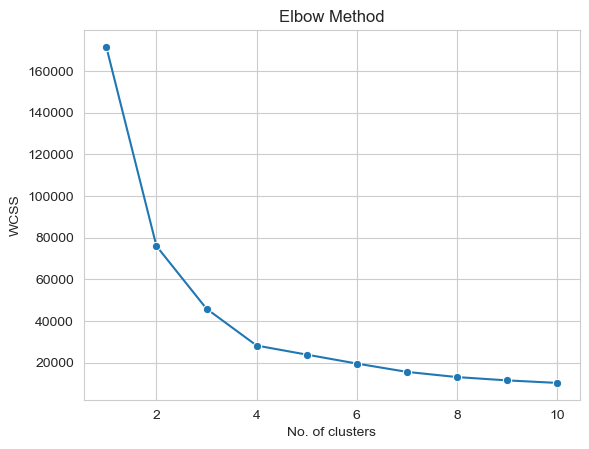

In [83]:
sns.set_style("whitegrid")
sns.lineplot(x=range(1,n_clusters_max), y=wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 4

In [84]:
n_cluster = 4

kmeans = KMeans(n_clusters=n_cluster, random_state=28)
kmeans.fit(X)
y= kmeans.labels_
centers = kmeans.cluster_centers_

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

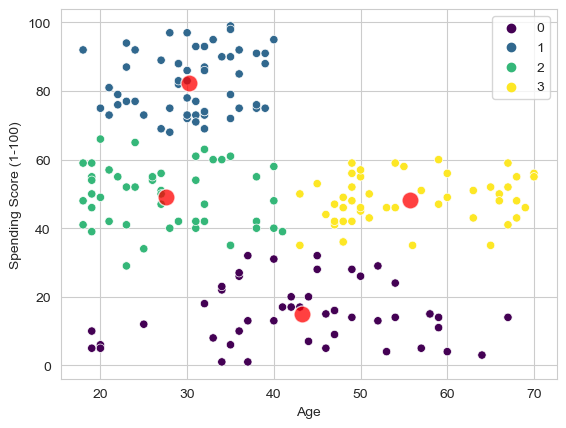

In [85]:
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=y, palette='viridis')
sns.scatterplot(x=centers[:,0], y=centers[:,1], c='red', s=150, alpha=0.75)

From scatterplot, Group 1, 2, and 3 has high spending score

In [86]:
customers["age_groups"] = y
target_age_groups = [1,2,3]
customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income_groups,age_groups
0,Male,19,15,39,1,2
1,Male,21,15,81,4,1
2,Female,20,16,6,1,0
3,Female,23,16,77,4,1
4,Female,31,17,40,1,2


Text(0.5, 1.0, 'Gender distribution')

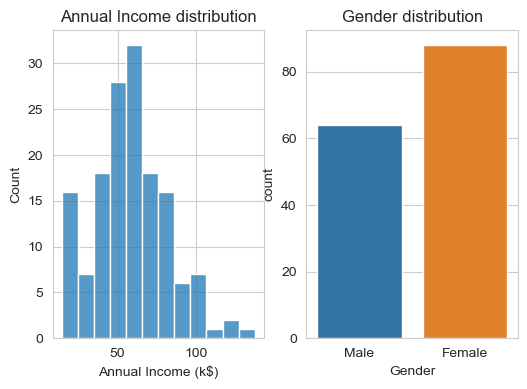

In [87]:
filtered_customers = customers[customers['age_groups'].isin(target_age_groups)]

plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.histplot(filtered_customers['Annual Income (k$)'])
plt.title("Annual Income distribution")
plt.subplot(1,2,2)
sns.countplot(x='Gender', data=filtered_customers)
plt.title("Gender distribution")

Target Customer seems to be at average income or lower, and slightly more Female

#### Final Analysis

In [88]:
display(customers.head())
print(f"Target age groups: {target_age_groups}")
print(f"Target age groups: {target_income_groups}")

,Gender,Age,Annual Income (k$),Spending Score (1-100),income_groups,age_groups
0,Male,19,15,39,1,2
1,Male,21,15,81,4,1
2,Female,20,16,6,1,0
3,Female,23,16,77,4,1
4,Female,31,17,40,1,2


Target age groups: [1, 2, 3]
Target age groups: [0, 4, 2]


In [89]:
# filter target customers from all customers
target_customers = customers[customers["income_groups"].isin(target_income_groups) | customers["age_groups"].isin(target_age_groups)]
target_customers_income = customers[customers["income_groups"].isin(target_income_groups)]
target_customers_age = customers[customers["age_groups"].isin(target_age_groups)]

display(target_customers.shape)
display(target_customers_income.shape)
display(target_customers_age.shape)


(152, 6)

(142, 6)

(152, 6)

##### Identify if target customers in both analysis are the same customers

In [90]:
# identify if target customer in age and income are the same
X = customers[['Annual Income (k$)', 'Spending Score (1-100)']]
n_cluster = 5

kmeans = KMeans(n_clusters=n_cluster, random_state=58)
kmeans.fit(X)
y= kmeans.labels_
centers = kmeans.cluster_centers_

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

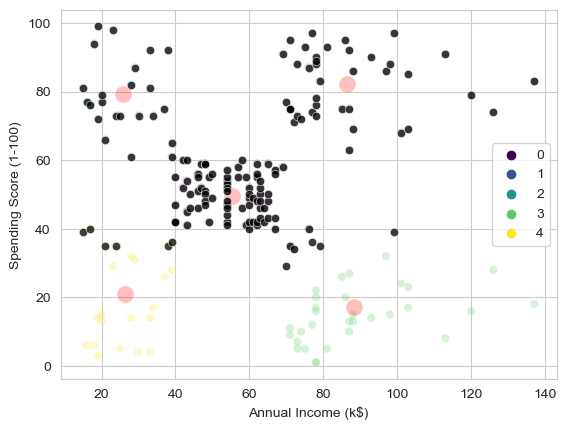

In [91]:
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=y, palette='viridis', alpha=0.25)
sns.scatterplot(x=centers[:,0], y=centers[:,1], c='red', s=150, alpha=0.25)

# from target customers based on age, what are their annual income?
target = target_customers_age[['Annual Income (k$)', 'Spending Score (1-100)']]
sns.scatterplot(x=target.iloc[:,0], y=target.iloc[:,1], color='black', alpha=0.75)

In [92]:
# identify if target customer in age and income are the same
X = customers[["Age", 'Spending Score (1-100)']]
n_cluster = 4

kmeans = KMeans(n_clusters=n_cluster, random_state=58)
kmeans.fit(X)
y= kmeans.labels_
centers = kmeans.cluster_centers_

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

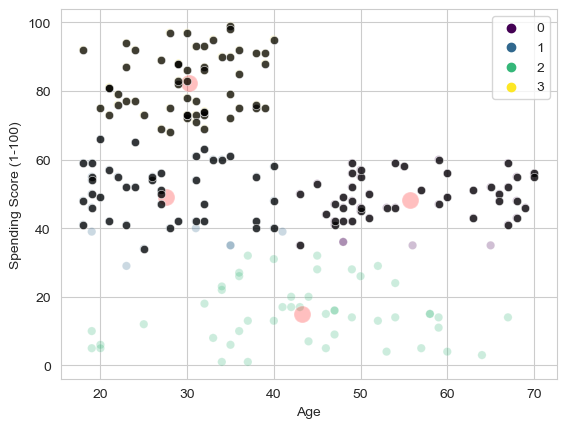

In [93]:
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=y, palette='viridis', alpha=0.25)
sns.scatterplot(x=centers[:,0], y=centers[:,1], c='red', s=150, alpha=0.25)

# from target customers based on annual income, what are their age?
target = target_customers_income[['Age', 'Spending Score (1-100)']]
sns.scatterplot(x=target.iloc[:,0], y=target.iloc[:,1], color='black', alpha=0.75)

Both group of target customers are the same group of people

#### Final Conclusion

Target customer Hypothesis from earlier:
1. Mostly below age of 50
2. Spending score above 40
3. Annual income mean and below (Affordable products)

Conclusion:
All of the hypothesis are correct, with more focus on products/services catered to young adults between 20 to 40 years old.
Since majority of customers has medium spending score (40~60), the mall should consider doing promotions, events, spending point rewards, to increase the mean of spending score